In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv("Company_Data.csv")

In [3]:
cmp = df.copy()

In [4]:
cmp.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [5]:
cmp.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
cmp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
cmp.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
cmp.shape

(400, 11)

C:\Users\Vishnu\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


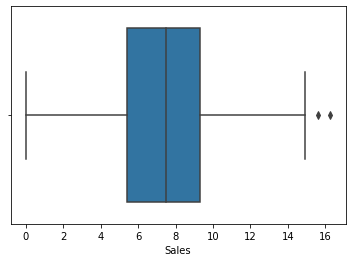

In [10]:
ax = sns.boxplot(cmp['Sales'])

In [11]:
plt.rcParams["figure.figsize"] = 9,5 

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


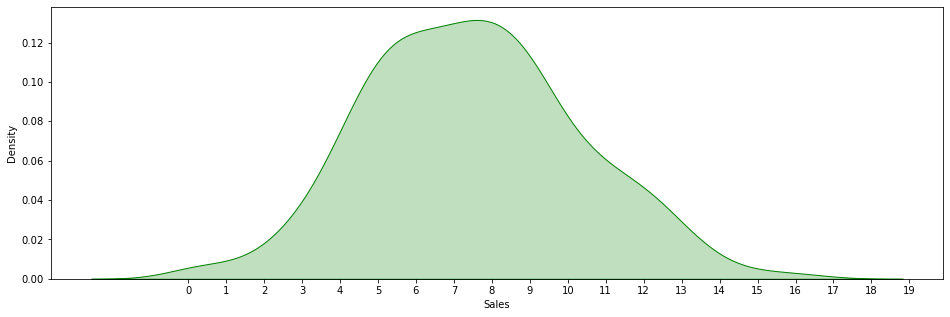

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(cmp['Sales'].skew()))
print("Kurtosis: {}".format(cmp['Sales'].kurtosis()))
ax = sns.kdeplot(cmp['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [13]:
obj_colum = cmp.select_dtypes(include='object').columns.tolist()

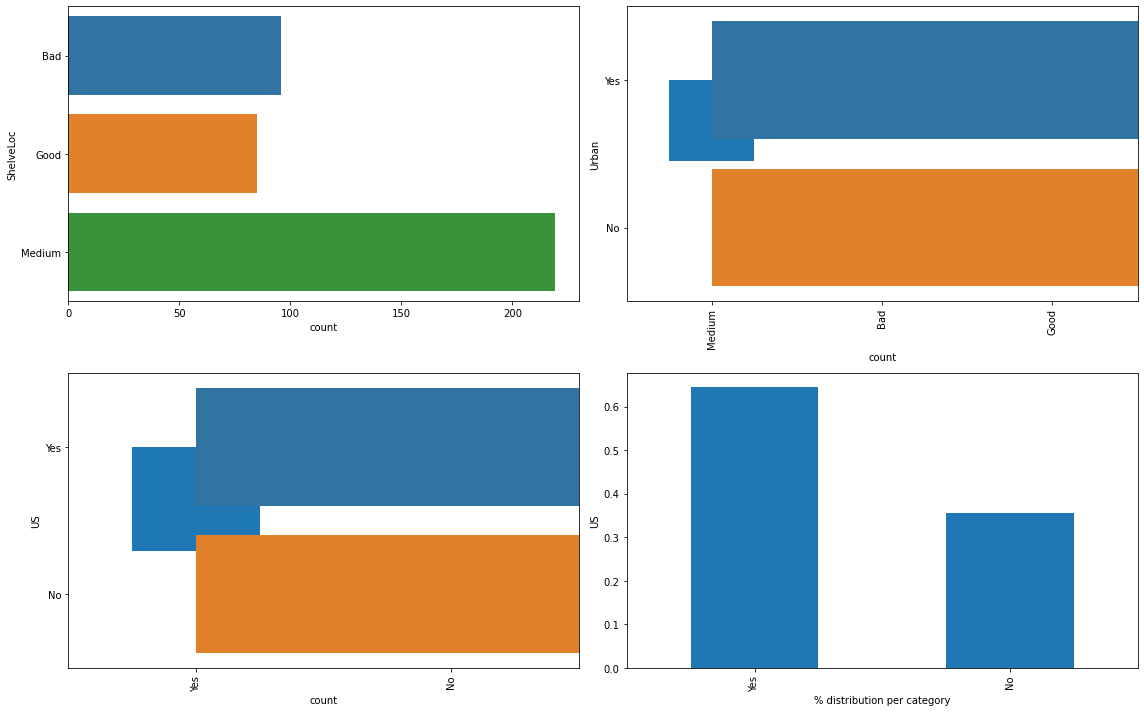

In [15]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=cmp,y=col)
    plt.subplot(2,2,i+1)
    cmp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [16]:
num_columns = cmp.select_dtypes(exclude='object').columns.tolist()

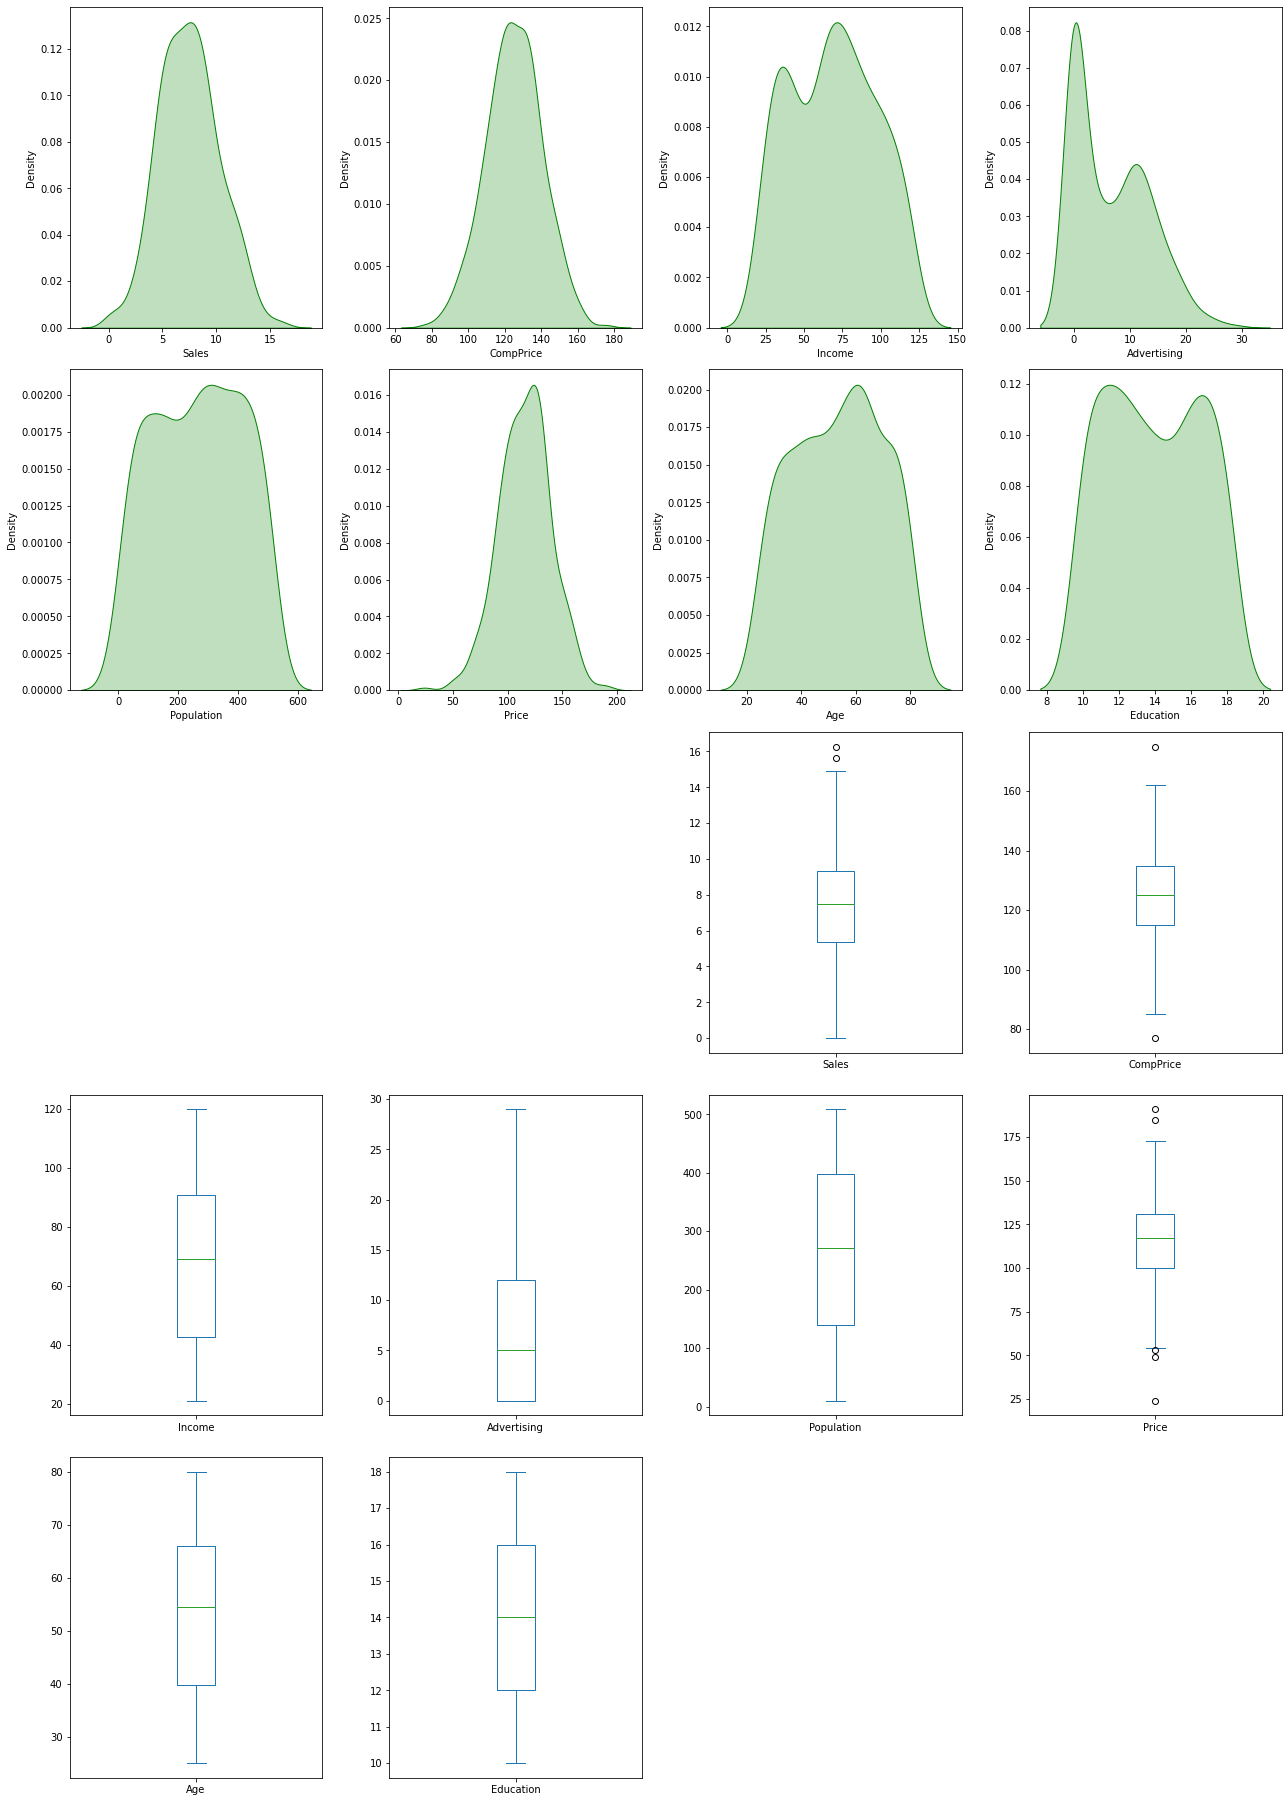

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [17]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [18]:
corr = cmp.corr()

In [19]:
cmp = pd.get_dummies(cmp, columns = ['ShelveLoc','Urban','US'])

In [20]:
corr = cmp.corr()

<AxesSubplot:>

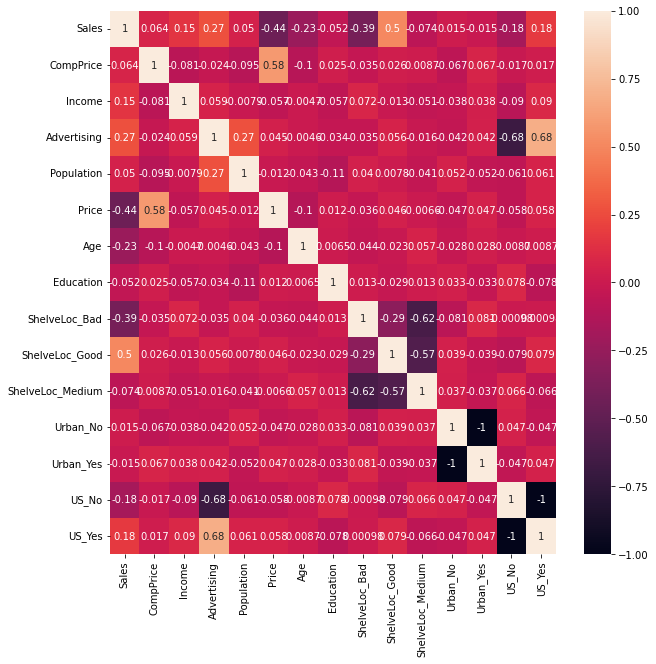

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [22]:
cmp["sales"]="small"
cmp.loc[cmp["Sales"]>7.49,"sales"]="large"
cmp.drop(["Sales"],axis=1,inplace=True)

In [23]:
X = cmp.iloc[:,0:14]
y = cmp.iloc[:,14]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [25]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [26]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
pred_train = model.predict(x_train)

In [28]:
accuracy_score(y_train,pred_train)

1.0

In [29]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [30]:
pred_test = model.predict(x_test)

In [31]:
accuracy_score(y_test,pred_test)

0.7375

In [32]:
confusion_matrix(y_test,pred_test)

array([[30, 10],
       [11, 29]], dtype=int64)

In [33]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [34]:
df_t

,Actual,Predicted
96,large,large
324,small,small
42,large,large
350,large,large
240,large,large
...,...,...
317,small,large
47,small,small
246,small,small
395,large,large


In [35]:
cols = list(cmp.columns)

In [36]:
predictors = cols[0:14]
target = cols[14]

In [37]:
dot_data = StringIO()

In [38]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [39]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [40]:
graph.write_png('company_full.png')

True

In [41]:
img = mpimg.imread("company_full.png")

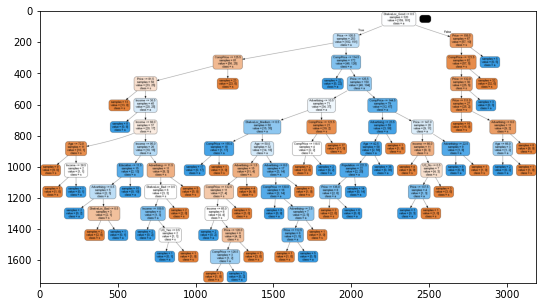

In [42]:
plt.imshow(img)

In [43]:
model.feature_importances_

array([0.20561534, 0.09408094, 0.1362311 , 0.00993374, 0.332458  ,
       0.05041142, 0.01138435, 0.01721853, 0.10358462, 0.02142055,
       0.        , 0.        , 0.01141121, 0.00625018])

In [44]:
Final = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [45]:
Final

,feature,importance
4,Price,0.332458
0,CompPrice,0.205615
2,Advertising,0.136231
8,ShelveLoc_Good,0.103585
1,Income,0.094081
5,Age,0.050411
9,ShelveLoc_Medium,0.021421
7,ShelveLoc_Bad,0.017219
12,US_No,0.011411
6,Education,0.011384


In [46]:
print("inferences from the above model; the most import feature is price")

inferences from the above model; the most import feature is price
